# 1. Importando Bibliotecas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 2. Analisando dados dos Influencer

In [5]:
path = "../data/influencer_data/"

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_influencer   = pd.concat(df_list, ignore_index=True)

In [12]:
df_influencer.head()

,uuid,data_ref,userID,seguidores,twwets
0,9f9f6b1f-153a-4753-9678-0cd895a6bde3,2023-04-19,Cellbit,5976407,3857
1,ae7571c9-8082-456f-940b-39cd74584da2,2023-04-15,Loiranoob,1755512,106251
2,c1f8a291-7d21-4634-8c06-fe6053e53ece,2023-04-24,BRKsEDU,1616770,773
3,34557da7-ce8f-4401-b6b5-e1c3f3287830,2023-04-24,Cellbit,5976487,3858
4,91015e95-1116-43cd-8be4-4de5efde00ac,2023-04-16,BRKsEDU,1616180,761


In [8]:
df_influencer.shape

(15, 5)

In [19]:
df_distinct = df_influencer.drop_duplicates(subset=['data_ref', 'userID'])
print(df_distinct.shape)
df_grouped = df_distinct.groupby(['userID', 'data_ref']).agg({'seguidores': 'sum'}).reset_index()

(15, 5)


In [20]:
df_grouped

,userID,data_ref,seguidores
0,BRKsEDU,2023-04-15,1616225
1,BRKsEDU,2023-04-16,1616180
2,BRKsEDU,2023-04-19,1616504
3,BRKsEDU,2023-04-20,1616502
4,BRKsEDU,2023-04-24,1616770
5,Cellbit,2023-04-15,5976402
6,Cellbit,2023-04-16,5976471
7,Cellbit,2023-04-19,5976407
8,Cellbit,2023-04-20,5976366
9,Cellbit,2023-04-24,5976487


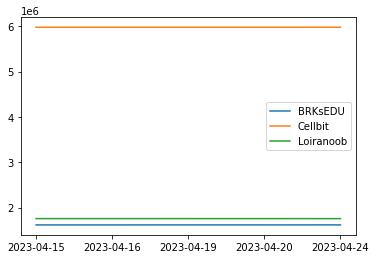

In [18]:
for user in df_grouped['userID'].unique():
    df_user = df_grouped[df_grouped['userID'] == user]
    plt.plot(df_user['data_ref'], df_user['seguidores'], label=user)

plt.legend()
plt.show()

## No curto Prazo a quantidade de Seguidores se mantem constante.